## About Dataset
Context
This is a small subset of dataset of Book reviews from Amazon Kindle Store category.

Content
5-core dataset of product reviews from Amazon Kindle Store category from May 1996 - July 2014. Contains total of 982619 entries. Each reviewer has at least 5 reviews and each product has at least 5 reviews in this dataset.
Columns

- asin - ID of the product, like B000FA64PK
- helpful - helpfulness rating of the review - example: 2/3.
- overall - rating of the product.
- reviewText - text of the review (heading).
- reviewTime - time of the review (raw).
- reviewerID - ID of the reviewer, like A3SPTOKDG7WBLN
- reviewerName - name of the reviewer.
- summary - summary of the review (description).
- unixReviewTime - unix timestamp.

Acknowledgements
This dataset is taken from Amazon product data, Julian McAuley, UCSD website. http://jmcauley.ucsd.edu/data/amazon/

License to the data files belong to them.

Inspiration
- Sentiment analysis on reviews.
- Understanding how people rate usefulness of a review/ What factors influence helpfulness of a review.
- Fake reviews/ outliers.
- Best rated product IDs, or similarity between products based on reviews alone (not the best idea ikr).
- Any other interesting analysis

#### Best Practises
1. Preprocessing And Cleaning
2. Train Test Split
3. BOW,TFIDF,Word2vec
4. Train ML algorithms

In [263]:
# Load the dataset
import pandas as pd
data=pd.read_csv('all_kindle_review.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [264]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [265]:
df=data[['reviewText','rating']]
df.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [266]:
df.shape

(12000, 2)

In [267]:
## Missing Values
df.isnull().sum()

reviewText    0
rating        0
dtype: int64

In [268]:
df['rating'].unique()

array([3, 5, 4, 2, 1])

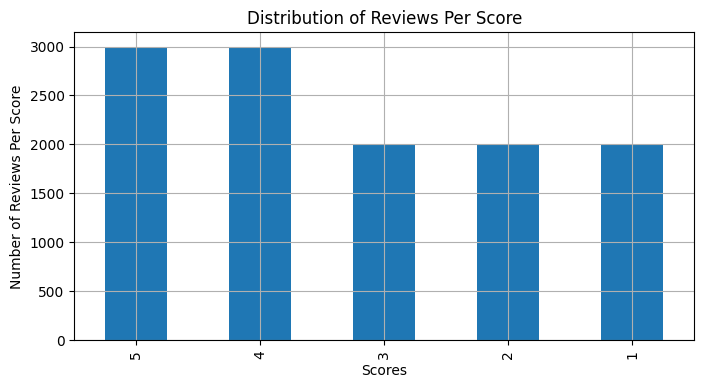

In [269]:

rating_values=df['rating'].value_counts()
plt.figure(figsize=(8,4))
rating_values.plot(kind='bar')
plt.grid()
plt.xlabel("Scores")
plt.ylabel("Number of Reviews Per Score")
plt.title("Distribution of Reviews Per Score")
plt.show()

In [270]:
## Preprocessing And Cleaning

In [271]:
df = df.loc[df['rating'] != 3]

In [272]:
## postive review is 1 and negative review is 0
df['rating']=df['rating'].apply(lambda x:0 if x<3 else 1)

In [273]:
df['rating'].value_counts()

rating
1    6000
0    4000
Name: count, dtype: int64

In [274]:
df.shape

(10000, 2)

In [275]:
# distribution 

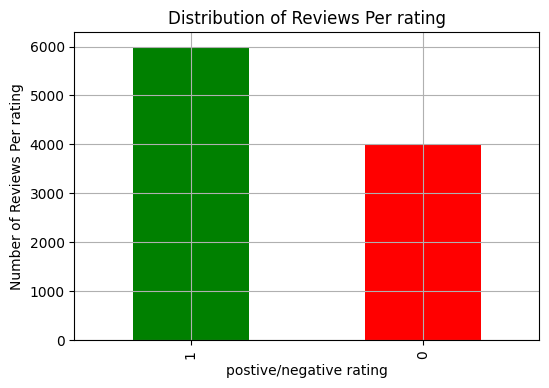

In [276]:
rating_posneg=df['rating'].value_counts()
plt.figure(figsize=(6,4))
my_color=['g','r']
rating_posneg.plot(kind='bar',color=my_color)
plt.grid()
plt.xlabel("postive/negative rating")
plt.ylabel("Number of Reviews Per rating")
plt.title("Distribution of Reviews Per rating")
plt.show()

In [277]:
## 1. Lower All the cases
df['reviewText']=df['reviewText'].str.lower()

In [278]:
df.head()

,reviewText,rating
1,great short read. i didn't want to put it dow...,1
4,i did not expect this type of book to be in li...,1
5,aislinn is a little girl with big dreams. afte...,1
6,this has the makings of a good story... unfort...,0
7,i got this because i like collaborated short s...,1


In [279]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/aditi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [280]:
from bs4 import BeautifulSoup

In [281]:
## Removing special characters
df['reviewText']=df['reviewText'].apply(lambda x:re.sub('[^a-z A-z 0-9-]+', '',x))
## Remove the stopswords
df['reviewText']=df['reviewText'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')]))
## Remove url 
df['reviewText']=df['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
## Remove html tags
df['reviewText']=df['reviewText'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
## Remove any additional spaces
df['reviewText']=df['reviewText'].apply(lambda x: " ".join(x.split()))


In [282]:
df.head()

,reviewText,rating
1,great short read didnt want put read one sitti...,1
4,expect type book library pleased find price right,1
5,aislinn little girl big dreams death older bro...,1
6,makings good story unfortunately disappointsit...,0
7,got like collaborated short stories alot times...,1


In [283]:
## Lemmatizer
from nltk.stem import WordNetLemmatizer

In [284]:
lemmatizer=WordNetLemmatizer()

In [285]:
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [286]:
df['reviewText']=df['reviewText'].apply(lambda x:lemmatize_words(x))

In [287]:
df.head()

,reviewText,rating
1,great short read didnt want put read one sitti...,1
4,expect type book library pleased find price right,1
5,aislinn little girl big dream death older brot...,1
6,making good story unfortunately disappointsit ...,0
7,got like collaborated short story alot time tw...,1


In [288]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['reviewText'],df['rating'],
                                              test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=0)

In [289]:
print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN CROSS VALIDATION DATA :", X_cv.shape[0])
print("NUMBER OF DATA POINTS IN TEST DATA :", X_test.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 6400
NUMBER OF DATA POINTS IN CROSS VALIDATION DATA : 1600
NUMBER OF DATA POINTS IN TEST DATA : 2000


In [290]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_vec = TfidfVectorizer(min_df=10, max_features=5000)
text_vec.fit(X_train.values)

train_text = text_vec.transform(X_train.values)
test_text = text_vec.transform(X_test.values)
cv_text = text_vec.transform(X_cv.values)

print("Shape of Matrix - TFIDF")
print(train_text.shape)
print(test_text.shape)
print(cv_text.shape)

Shape of Matrix - TFIDF
(6400, 3409)
(2000, 3409)
(1600, 3409)


For Values of Alpha = 1e-05 The Log Loss is: 0.29932172455247
For Values of Alpha = 0.0001 The Log Loss is: 0.2878367070994218
For Values of Alpha = 0.001 The Log Loss is: 0.3233979972656148
For Values of Alpha = 0.01 The Log Loss is: 0.3594287939265763
For Values of Alpha = 0.1 The Log Loss is: 0.45688106977248033
For Values of Alpha = 1 The Log Loss is: 0.4998323079769564


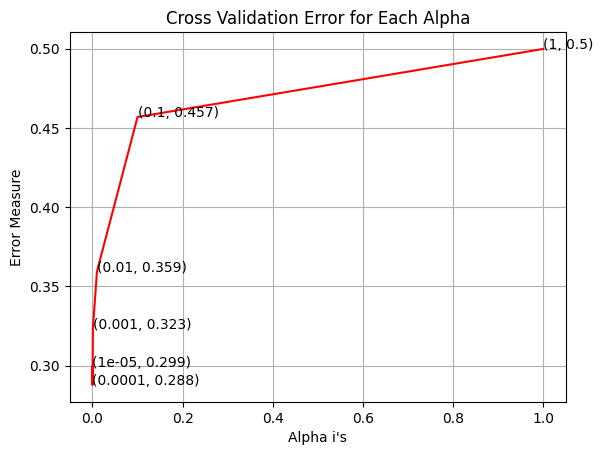

For Values of Best Alpha = 0.0001 The Train Log Loss is: 0.19004801983031797
For Values of Best Alpha = 0.0001 The Test Log Loss is: 0.27229932923837974
For Values of Best Alpha = 0.0001 The Cross Validation Log Loss is: 0.2878367070994218


In [291]:
#train a logistic regression + calibration model using text features which are tfidf encoded
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log_loss', random_state=42)
    clf.fit(train_text, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text, y_train)
    
    predict_y = sig_clf.predict_proba(cv_text)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_))
    print('For Values of Alpha =',i,"The Log Loss is:",log_loss(y_cv, predict_y, labels=clf.classes_))
import numpy as np
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c='r')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
    
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log_loss', random_state=42)
clf.fit(train_text, y_train)

lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
lr_sig_clf.fit(train_text, y_train)

predict_y = lr_sig_clf.predict_proba(train_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_))

predict_y = lr_sig_clf.predict_proba(test_text)

print('For Values of Best Alpha =', alpha[best_alpha],"The Test Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_))

predict_y = lr_sig_clf.predict_proba(cv_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Cross Validation Log Loss is:",log_loss(y_cv, predict_y, labels=clf.classes_))

In [292]:
lr_train_accuracy = (lr_sig_clf.score(train_text, y_train)*100)
lr_test_accuracy = (lr_sig_clf.score(test_text, y_test)*100)
lr_cv_accuracy = (lr_sig_clf.score(cv_text, y_cv)*100)

print("Logistic Regression Train Accuracy :",lr_train_accuracy)
print("Logistic Regression Test Accuracy :",lr_test_accuracy)
print("Logistic Regression CV Accuracy :",lr_cv_accuracy)

Logistic Regression Train Accuracy : 93.703125
Logistic Regression Test Accuracy : 88.7
Logistic Regression CV Accuracy : 88.375


In [293]:
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer()
X_train_bow=bow.fit_transform(X_train).toarray()
X_test_bow=bow.transform(X_test).toarray()

In [294]:
# Ensure all data is of string type:
X_train = X_train.astype(str)
X_test = X_test.astype(str)
X_cv = X_cv.astype(str)
# Applying TFIDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)
cv_text = tfidf.transform(X_cv.values)

In [295]:
X_train_tfidf=X_train_tfidf.toarray()

In [296]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [297]:
X_train_tfidf.shape

(6400, 27650)

In [298]:
X_test_tfidf=X_test_tfidf.toarray()

In [299]:
X_test_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [300]:
X_test_tfidf.shape

(2000, 27650)

In [301]:
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [302]:
X_train_bow.shape

(6400, 27650)

In [303]:
X_test_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [304]:
X_test_bow.shape

(2000, 27650)

In [305]:
from sklearn.naive_bayes import GaussianNB
nb_model_bow=GaussianNB().fit(X_train_bow,y_train)
nb_model_tfidf=GaussianNB().fit(X_train_tfidf,y_train)

In [306]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [307]:
y_pred_bow=nb_model_bow.predict(X_test_bow)

In [308]:
y_pred_tfidf=nb_model_bow.predict(X_test_tfidf)

In [309]:
confusion_matrix(y_test,y_pred_bow)

array([[561, 220],
       [526, 693]])

In [310]:
print("BOW accuracy: ",accuracy_score(y_test,y_pred_bow))

BOW accuracy:  0.627


In [311]:
confusion_matrix(y_test,y_pred_tfidf)

array([[537, 244],
       [509, 710]])

In [312]:
print("TFIDF accuracy: ",accuracy_score(y_test,y_pred_tfidf))

TFIDF accuracy:  0.6235


In [313]:
df2=pd.read_csv('all_kindle_review.csv')
df2=df2[['reviewText','rating']]
df2.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [314]:
df2 = df2.loc[df2['rating'] != 3]

In [315]:
## postive review is 1 and negative review is 0
df2['rating']=df2['rating'].apply(lambda x:0 if x<3 else 1)

In [316]:
df2.shape

(10000, 2)

In [317]:
pip install scipy==1.10.1

Note: you may need to restart the kernel to use updated packages.


In [318]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [319]:
df2.index

Index([    1,     4,     5,     6,     7,     8,     9,    10,    11,    12,
       ...
       11986, 11988, 11989, 11990, 11991, 11992, 11993, 11995, 11996, 11998],
      dtype='int64', length=10000)

In [320]:
df2.reset_index(drop=True, inplace=True)

In [321]:
corpus = []
for i in range(0, len(df2['reviewText'])):
    review = re.sub('[^a-zA-Z]', ' ', df2['reviewText'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [322]:
corpus

['great short read i didn t want to put it down so i read it all in one sitting the sex scene were great between the two male and one female character a bit surprising i never thought you could do that i learned something new and really enjoyed reading this book this is a great way to get all hot and bothered and take advantage of your significant other s',
 'i did not expect this type of book to be in library wa pleased to find it price wa right',
 'aislinn is a little girl with big dream after the death of her older brother she decides to follow in his footstep and become a lady knight her quest for knighthood brings many challenge and the temptation of forbidden love aislinn learns that being a knight mean putting the kingdom in front of personal concern and helping those that cannot help themselves in a journey is fraught with danger and filled with adventure aislinn is forced to grow up fast she must stay strong and develop the skill necessary to realize her lifelong dream with sw

In [323]:
[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus, df2['reviewText']) if i<1]

[]

In [324]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [325]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [326]:
words

[['great',
  'short',
  'read',
  'didn',
  'want',
  'to',
  'put',
  'it',
  'down',
  'so',
  'read',
  'it',
  'all',
  'in',
  'one',
  'sitting',
  'the',
  'sex',
  'scene',
  'were',
  'great',
  'between',
  'the',
  'two',
  'male',
  'and',
  'one',
  'female',
  'character',
  'bit',
  'surprising',
  'never',
  'thought',
  'you',
  'could',
  'do',
  'that',
  'learned',
  'something',
  'new',
  'and',
  'really',
  'enjoyed',
  'reading',
  'this',
  'book',
  'this',
  'is',
  'great',
  'way',
  'to',
  'get',
  'all',
  'hot',
  'and',
  'bothered',
  'and',
  'take',
  'advantage',
  'of',
  'your',
  'significant',
  'other'],
 ['did',
  'not',
  'expect',
  'this',
  'type',
  'of',
  'book',
  'to',
  'be',
  'in',
  'library',
  'wa',
  'pleased',
  'to',
  'find',
  'it',
  'price',
  'wa',
  'right'],
 ['aislinn',
  'is',
  'little',
  'girl',
  'with',
  'big',
  'dream',
  'after',
  'the',
  'death',
  'of',
  'her',
  'older',
  'brother',
  'she',
  'deci

In [327]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# text_vec = TfidfVectorizer(min_df=10, max_features=5000)
# X_train_tfidf2=text_vec.fit_transform(X_train.values)
# X_test_tfidf2=text_vec.fit(X_test)
# cv_text = text_vec.transform(X_cv.values)

In [328]:
## Lets train Word2vec from scratch
model=gensim.models.Word2Vec(words)

In [329]:
model.corpus_count

10000

In [330]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)
    
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)

In [331]:
!pip install tqdm

In [332]:
from tqdm import tqdm

In [333]:
#apply for the entire sentences
import numpy as np
X=[]
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

100%|████████████████████████████████████| 10000/10000 [00:13<00:00, 715.90it/s]


In [334]:
len(X)

10000

In [335]:
X_new=np.array(X)

In [336]:
X_new

array([[-0.29426637, -0.34884855,  0.37018394, ..., -0.68583757,
         0.1566164 , -0.43352643],
       [-0.43831977, -0.12078441,  0.03661764, ..., -0.51764244,
         0.19687828, -0.40755183],
       [-0.44821766,  0.23422481,  0.26464343, ..., -0.29753327,
         0.11817502, -0.18840231],
       ...,
       [-0.33059502,  0.28449437,  0.5441501 , ..., -0.459884  ,
         0.26649216, -0.1272386 ],
       [-0.23471336, -0.27971327,  0.23224035, ..., -0.5956602 ,
         0.21837606, -0.37868336],
       [-0.33186257,  0.12702659, -0.16396557, ..., -0.40393788,
        -0.09260137, -0.46615955]], dtype=float32)

In [337]:
X_new.shape

(10000, 100)

In [338]:
X_new[0].shape

(100,)

In [339]:
## Dependent Features
## Output Features
# Ensure alignment and filter `df2`
df2.reset_index(drop=True, inplace=True)
y = df2[[len(c) > 0 for c in corpus]]
y=pd.get_dummies(df2['rating'])
y=y.iloc[:,0].values

In [340]:
y.shape

(10000,)

In [341]:
X_new[0].reshape(1,-1).shape

(1, 100)

In [342]:
## this is the final independent features
# df=pd.DataFrame()
# for i in range(0,len(X_new)):
#     df=df.append(pd.DataFrame(X_new[i].reshape(1,-1)),ignore_index=True)
df = pd.DataFrame()
for i in range(0, len(X_new)):
    new_row = X_new[i].reshape(1, -1)
    df = pd.concat([df, pd.DataFrame(new_row)], ignore_index=True)

In [343]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.294266,-0.348849,0.370184,-0.143489,0.091954,-0.649754,0.458698,1.200388,-0.401028,-0.664787,...,0.612945,0.288847,0.006791,-0.187462,0.179686,-0.067744,-0.737040,-0.685838,0.156616,-0.433526
1,-0.438320,-0.120784,0.036618,-0.204979,-0.060435,-0.304533,-0.065334,1.013276,-0.357807,-0.322558,...,0.844119,0.274945,0.172026,-0.174665,0.582031,0.386050,-0.569810,-0.517642,0.196878,-0.407552
2,-0.448218,0.234225,0.264643,0.144883,0.118398,-0.533134,0.259746,0.653640,-0.433198,-0.345067,...,0.115338,0.234124,-0.079554,-0.117649,0.187869,0.237015,-0.205208,-0.297533,0.118175,-0.188402
3,-0.458744,0.144243,0.386015,0.035603,0.051175,-0.589982,0.207657,0.761757,-0.480054,-0.544081,...,0.240283,0.028276,0.131536,-0.276430,0.283429,0.057170,-0.368772,-0.412907,-0.080889,-0.381315
4,-0.306189,-0.027769,0.192769,-0.063197,0.061929,-0.459884,0.306263,0.921671,-0.454312,-0.514440,...,0.486296,0.107260,0.086636,-0.144784,0.262739,0.018107,-0.500649,-0.533956,0.153803,-0.416739


In [344]:
df['Output']=y

In [345]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Output
0,-0.294266,-0.348849,0.370184,-0.143489,0.091954,-0.649754,0.458698,1.200388,-0.401028,-0.664787,...,0.288847,0.006791,-0.187462,0.179686,-0.067744,-0.737040,-0.685838,0.156616,-0.433526,False
1,-0.438320,-0.120784,0.036618,-0.204979,-0.060435,-0.304533,-0.065334,1.013276,-0.357807,-0.322558,...,0.274945,0.172026,-0.174665,0.582031,0.386050,-0.569810,-0.517642,0.196878,-0.407552,False
2,-0.448218,0.234225,0.264643,0.144883,0.118398,-0.533134,0.259746,0.653640,-0.433198,-0.345067,...,0.234124,-0.079554,-0.117649,0.187869,0.237015,-0.205208,-0.297533,0.118175,-0.188402,False
3,-0.458744,0.144243,0.386015,0.035603,0.051175,-0.589982,0.207657,0.761757,-0.480054,-0.544081,...,0.028276,0.131536,-0.276430,0.283429,0.057170,-0.368772,-0.412907,-0.080889,-0.381315,True
4,-0.306189,-0.027769,0.192769,-0.063197,0.061929,-0.459884,0.306263,0.921671,-0.454312,-0.514440,...,0.107260,0.086636,-0.144784,0.262739,0.018107,-0.500649,-0.533956,0.153803,-0.416739,False


In [346]:
# df.dropna(inplace=True)

In [347]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
96        0
97        0
98        0
99        0
Output    0
Length: 101, dtype: int64

In [348]:
df.shape

(10000, 101)

In [349]:
X_wv=df.drop(columns=['Output'])

In [350]:
X_wv.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)

In [351]:
X_wv.shape

(10000, 100)

In [352]:
y_wv=df['Output']

In [353]:
y_wv.shape

(10000,)

In [354]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train_wv,X_test_wv,y_train_wv,y_test_wv=train_test_split(X_wv,y_wv,test_size=0.20)
X_train_wv, X_cv_wv, y_train_wv, y_cv_wv = train_test_split(X_train_wv, y_train_wv, test_size=0.20, stratify=y_train_wv, random_state=0)

In [355]:
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn


In [356]:
from imblearn.ensemble import BalancedRandomForestClassifier
classifier=BalancedRandomForestClassifier()

In [357]:
classifier.fit(X_train_wv,y_train_wv)

BalancedRandomForestClassifier()

In [358]:
y_pred=classifier.predict(X_test_wv)

In [359]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))

0.4905


In [360]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.39      0.56      0.46       781
           1       0.61      0.45      0.52      1219

    accuracy                           0.49      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.53      0.49      0.50      2000



In [361]:

print(X_train_wv.select_dtypes(include=['object']).columns)  # Columns with text data


Index([], dtype='object')


For Values of Alpha = 1e-05 The Log Loss is: 0.37110490689849873
For Values of Alpha = 0.0001 The Log Loss is: 0.37658623552800136
For Values of Alpha = 0.001 The Log Loss is: 0.39325364367748683
For Values of Alpha = 0.01 The Log Loss is: 0.43141885677750536
For Values of Alpha = 0.1 The Log Loss is: 0.4722982344426525
For Values of Alpha = 1 The Log Loss is: 0.4737899745066987


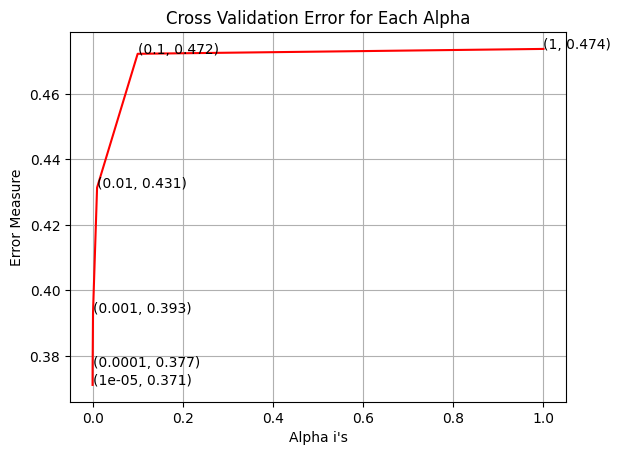

For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.35323237255558676
For Values of Best Alpha = 1e-05 The Test Log Loss is: 0.3783387013236155
For Values of Best Alpha = 1e-05 The Cross Validation Log Loss is: 0.37110490689849873


In [362]:
#train a logistic regression + calibration model using text features which are tfidf encoded
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_wv, y_train_wv)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_wv, y_train_wv)
    
    predict_y = sig_clf.predict_proba(X_cv_wv)
    cv_log_error_array.append(log_loss(y_cv_wv, predict_y, labels=clf.classes_, eps=1e-15))
    
    print('For Values of Alpha =',i,"The Log Loss is:",log_loss(y_cv_wv, predict_y, labels=clf.classes_, eps=1e-15))
    
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c='r')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
    
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_wv, y_train_wv)

lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
lr_sig_clf.fit(X_train_wv, y_train_wv)

predict_y = lr_sig_clf.predict_proba(X_train_wv)
print('For Values of Best Alpha =', alpha[best_alpha],"The Train Log Loss is:",log_loss(y_train_wv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = lr_sig_clf.predict_proba(X_test_wv)
print('For Values of Best Alpha =', alpha[best_alpha],"The Test Log Loss is:",log_loss(y_test_wv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(X_cv_wv)
print('For Values of Best Alpha =', alpha[best_alpha],"The Cross Validation Log Loss is:",log_loss(y_cv_wv, predict_y, labels=clf.classes_, eps=1e-15))

In [363]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

lr_clf = LogisticRegression()
lr_sig_clf = CalibratedClassifierCV(lr_clf, method="sigmoid")
lr_sig_clf.fit(X_train_wv, y_train_wv)

# Calculate accuracies
lr_train_accuracy = lr_sig_clf.score(X_train_wv, y_train_wv) * 100
lr_test_accuracy = lr_sig_clf.score(X_test_wv, y_test_wv) * 100
lr_cv_accuracy = lr_sig_clf.score(X_cv_wv, y_cv_wv) * 100

print("Logistic Regression Train Accuracy:", lr_train_accuracy)
print("Logistic Regression Test Accuracy:", lr_test_accuracy)
print("Logistic Regression CV Accuracy:", lr_cv_accuracy)

Logistic Regression Train Accuracy: 84.0
Logistic Regression Test Accuracy: 82.25
Logistic Regression CV Accuracy: 84.125


In [364]:
print(X_train_wv.shape,X_test_wv.shape,y_train_wv.shape,y_test_wv.shape)
print('--'*30)
print(X_train_wv.shape, X_cv_wv.shape, y_train_wv.shape, y_cv_wv.shape )

(6400, 100) (2000, 100) (6400,) (2000,)
------------------------------------------------------------
(6400, 100) (1600, 100) (6400,) (1600,)


In [1]:
# CalibratedClassifierCV

In [365]:
y_test_wv_pred = lr_sig_clf.predict(X_test_wv)

In [366]:
from sklearn.metrics import classification_report
print(classification_report(y_test_wv, y_test_wv_pred))


              precision    recall  f1-score   support

       False       0.85      0.86      0.86      1218
        True       0.78      0.76      0.77       782

    accuracy                           0.82      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.82      0.82      0.82      2000



In [367]:
# Predict - Test Data

In [368]:
y_test_wv_pred_list = y_test_wv_pred.tolist()
y_test_wv_pred_list[:5]

[False, False, False, False, True]

In [369]:
y_test_wv_pred_binary = [int(value) for value in y_test_wv_pred_list]
print(y_test_wv_pred_binary[:5]) 

[0, 0, 0, 0, 1]


In [370]:
y_test_wv_pred_pn=["Positive" if i==1 else "Negative" for i in y_test_wv_pred_binary]

In [371]:
# import sklearn
# print(sklearn.__version__)

In [372]:
final_test_df = pd.DataFrame({'Text':X_test, 'Review': y_test_wv_pred_pn})

In [373]:
final_test_df.head(10)

,Text,Review
10457,amazon search google search find anything find...,Negative
6334,absolutely love sold story separately instead ...,Negative
6851,short story full umm sexthought reading someth...,Negative
9986,book midnight reborn robyn andrew young girl s...,Negative
6190,fifth book bianca darcs dragon seriesi loved s...,Positive
7682,brenda jackson say seem love stuff could put l...,Negative
2861,novel stumped love author style vivid descript...,Negative
10960,shifter romance book 2 halle puma shifter book...,Positive
9210,another hard-to-put book jessica coulter smith...,Negative
8921,sure expect ipod touch like read book purchase...,Negative


In [374]:
final_test_df.values[6]

array(['novel stumped love author style vivid description handling sex scene hot spicy didnt quite know however make frighteningly clever play history know history cant say didnt like much right yet didnt love usually author whole jesus concept twin abbie caught freak nature enthralling almost compelling enjoy book heather read see think one thing certain however fact clever book clever writer',
       'Negative'], dtype=object)

In [375]:
# Using TFIDF AND BALANCEDRANDOMFOREST

In [376]:
# ## Train Test Split
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
# X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=0)

In [377]:
X_train_tfid_=pd.DataFrame(X_train_tfidf)

In [378]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# text_vec = TfidfVectorizer(min_df=10, max_features=5000)

# # Fit and transform on the training data
# X_train_tfidf = text_vec.fit_transform(X_train)

# # Transform the cross-validation data
# X_cv_tfidf = text_vec.transform(X_cv)

# # Transform the cross-validation (CV) set
# X_cv_tfidf = text_vec.transform(X_cv).toarray()
# cv_text = text_vec.transform(X_cv.values)

In [379]:
X_train_tfid_.head()

,0,1,2,3,4,5,6,7,8,9,...,27640,27641,27642,27643,27644,27645,27646,27647,27648,27649
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [380]:
y_train

2229     1
6118     0
9252     0
641      1
781      0
        ..
274      1
10670    1
1055     0
5916     0
9665     0
Name: rating, Length: 6400, dtype: int64

In [381]:
# y_train=pd.DataFrame(y_train)

In [382]:
# y_train.head()

In [383]:
from imblearn.ensemble import BalancedRandomForestClassifier
classifier=BalancedRandomForestClassifier()

In [384]:
classifier.fit(X_train_tfid_,y_train)

BalancedRandomForestClassifier()

In [385]:
y_pred=classifier.predict(X_test_tfidf)

In [386]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))

0.8515


In [387]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       781
           1       0.91      0.83      0.87      1219

    accuracy                           0.85      2000
   macro avg       0.84      0.86      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [388]:
# Predict - Test Data

In [389]:
y_test_tfidf_pred_list = y_pred.tolist()
y_test_tfidf_pred_list[:5]

[0, 0, 0, 1, 1]

In [390]:
y_test_tfidf_pred_pn=["Positive" if i==1 else "Negative" for i in y_test_tfidf_pred_list]

In [391]:
final_test_df = pd.DataFrame({'Text':X_test, 'Review': y_test_tfidf_pred_pn})

In [392]:
final_test_df.head()

,Text,Review
10457,amazon search google search find anything find...,Negative
6334,absolutely love sold story separately instead ...,Negative
6851,short story full umm sexthought reading someth...,Negative
9986,book midnight reborn robyn andrew young girl s...,Positive
6190,fifth book bianca darcs dragon seriesi loved s...,Positive


In [393]:
final_test_df.values[7]

array(['shifter romance book 2 halle puma shifter book enjoyable could stand alone help read first book doesnt like reading well put together artist protective streak good character good plot leaf wanting read next series worth read',
       'Positive'], dtype=object)